# Build a Logistic Regression model with Polynomial transformation from Scratch

For all tasks you must explain what you do for each step and why you do this way with clear math equations ([cheatsheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)).

## Task 1:
- a)Write down the equation for computing loss function, identify parameters to be learned
- b) Write equation for gradient of loss function
- c) Write algorithm in pseudo code or describe steps in English
- d) Build a logistic regression model to classify dataset below
- e) Compute confusion matrix and AUC of your model
- f) Plot decision boundary


## Ref:
- https://colab.research.google.com/drive/1ng3-rP3GhMmZPRhvjhgQxZ2o01kQnTjP#scrollTo=lsU4_tVsNk55
- https://colab.research.google.com/drive/14UoYtrkcr3GwY_2NIcJfSDb4fsnU1AXL#scrollTo=ON4WbEBvk9Z9 (note your loss function is different from linear regression)

In [ ]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6.18]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

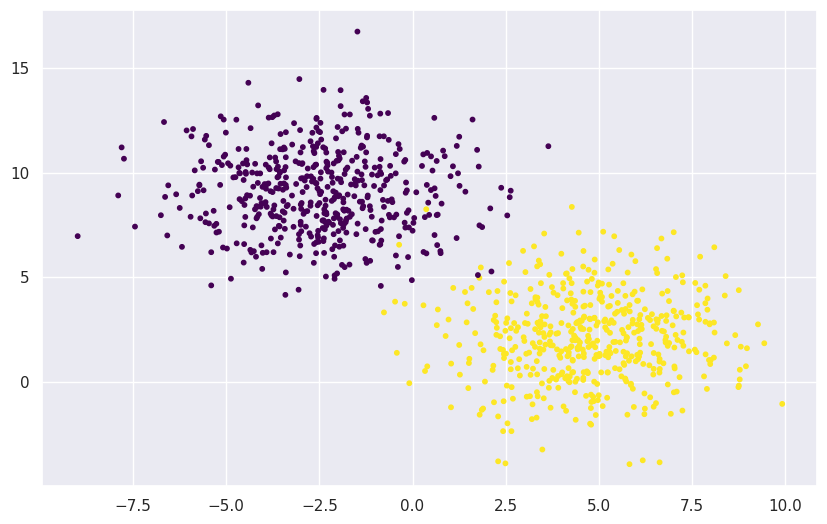

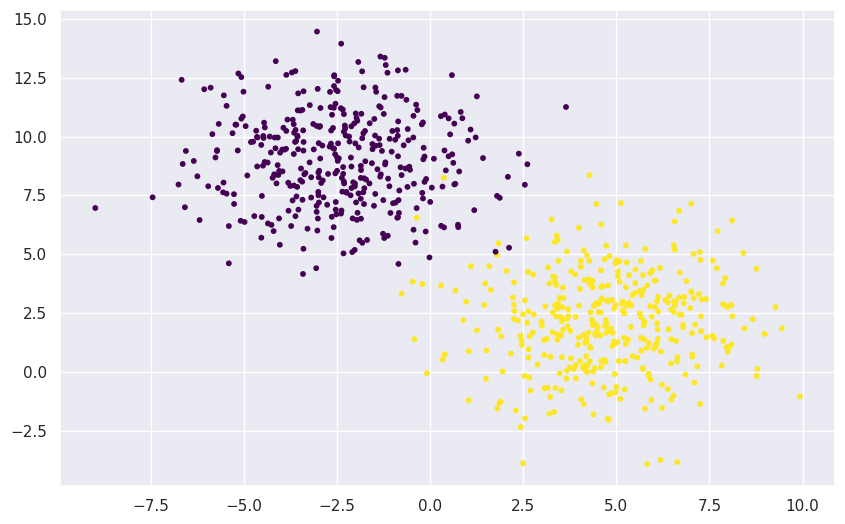

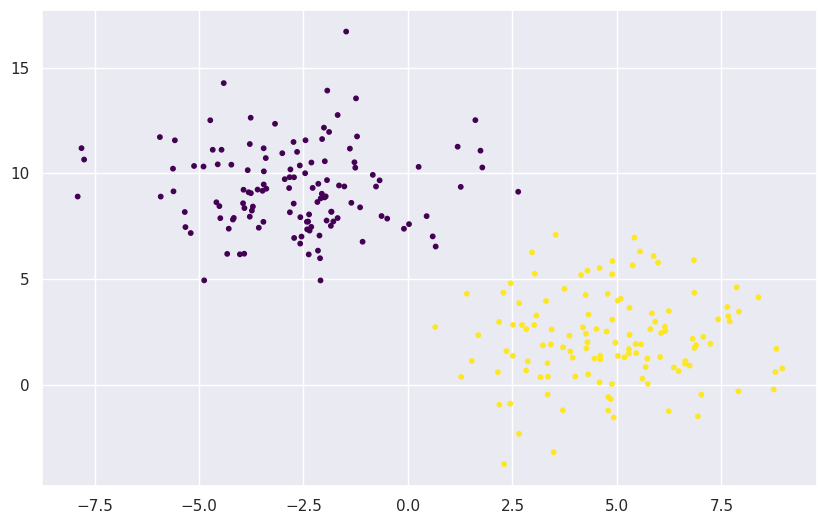

In [ ]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,s=10, cmap='viridis')
plt.show()

trainX,testX,trainy,testy = train_test_split(X,y, random_state=42)
plt.scatter(trainX[:,0],trainX[:,1],c=trainy,s=10, cmap='viridis')
plt.show()

plt.scatter(testX[:,0],testX[:,1],c=testy,s=10, cmap='viridis')
plt.show()

## a) Write down the equation for computing loss function, identify parameters to be learned


 $$ \underset{\theta}{\operatorname{argmax}} \ =  log(L(y| \theta, X))
$$

I feel like I am more used to using β, so I will replace Θ with it.

Parameters to be learned =
$$\hat{\beta_.} =  \hat{\beta_0},\hat{\beta_1},\hat{\beta_2}$$

$$ \underset{{\beta_0},{\beta_1},{\beta_2}}{\operatorname{argmax}} \ = ln(L(y; \beta_0, \beta_1, \beta_2)) =
ln( \prod_{i=0}^{n} \sigma(\beta^TX_i)^{y_i}
[1- \sigma(\beta^TX_i)]^{1-y_i} )
$$

$$
= \sum_{i=0}^n ln(\sigma(\beta^TX_i)^{y_i}
[1- \sigma(\beta^TX_i)]^{1-y_i})
$$

$$
= \sum_{i=0}^n \left[ y_iln(\sigma(\beta^TX_i))+ (1-y_i)
[ln(1- \sigma(\beta^TX_i))] \right]
$$

$$
= \sum_{i=0}^n \left[ y_i ln \left(\frac{1} {1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) + (1-y_i)
ln \left(1- \frac{1} {1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right]
$$

$$
= \sum_{i=0}^n \left[ y_i ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) +
(1-y_i)
ln \left ( \frac{(1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}) - 1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right]
$$

$$
= \sum_{i=0}^n \left[ y_i ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) +
(1-y_i)
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right]
$$

$$
= \sum_{i=0}^n \left[ y_i ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) +
1 \cdot
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)
-y_i
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right]
$$


$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)  +
y_i ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)
-y_i
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)  +
y_i \left (ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)
-
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)  +
y_i \left (ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
\div
 \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)  +
y_i \left (ln \left(\frac{1}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
 \frac {1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right)  +
y_i \left (ln \left(\frac{1}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
\frac{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}}}
{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}}}
 \right)  +
y_i \left (ln \left(\frac{1}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
ln \left ( \frac{1}
{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1} \right)  +
y_i \left (ln \left(\frac{1}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} \right) \right) \right]
$$


$$
= \sum_{i=0}^n \left[  
  ln (1) - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(ln (1) -ln (
e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} ) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
  0 - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(0 - (
-\beta_0-\beta_1x_{i1}-\beta_2x_{i2} ) \right) \right]
$$

$$
= \sum_{i=0}^n \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
$$



## b) Write equation for gradient of loss function

$$
\nabla_{\beta_0, \beta_1, \beta_2} L(\beta_0, \beta_1, \beta_2) = \frac{\partial L}{\partial \beta_0}, \frac{\partial L}{\partial \beta_1}, \frac{\partial L}{\partial \beta_2}
$$

$$
\nabla_{\beta_0, \beta_1, \beta_2} L(y;\beta_0, \beta_1, \beta_2) = \nabla_{\beta_0, \beta_1, \beta_2} \left( \sum_{i=0}^n \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
\right)
$$

$$
=  \sum_{i=0}^n \nabla_{\beta_0, \beta_1, \beta_2} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
$$

1. $$\nabla_{\beta_0} $$
 $$
 \sum_{i=0}^n \nabla_{\beta_0} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
$$

$$
 = \sum_{i=0}^n \frac{\partial L}{\partial \beta_0} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$

$$
 = \sum_{i=0}^n  \left[  
  - \frac{\partial L}{\partial \beta_0} ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +  \frac{\partial L}{\partial \beta_0}
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$

$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \cdot e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} +  y_i    \right] $$

$$
= \sum_{i=0}^n  \left[  
-  \frac{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}}} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} +  y_i    \right] $$

$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1} +  y_i    \right] $$

$$
 = \sum_{i=0}^n  \left[  
 y_i  -  \frac{1} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1}     \right] $$

$$
 = \sum_{i=0}^n  \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] $$

 Where $\beta$ is a matrix

$$
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\end{bmatrix}
$$

and $X_i$ is

$$
\begin{bmatrix}
1 & x_1 & x_2\\
\end{bmatrix}
$$


2. $$\nabla_{\beta_1} $$
$$
 \sum_{i=0}^n \nabla_{\beta_1} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
$$


$$
 = \sum_{i=0}^n \frac{\partial L}{\partial \beta_1} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$
$$
 = \sum_{i=0}^n  \left[  
  - \frac{\partial L}{\partial \beta_1} ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +  \frac{\partial L}{\partial \beta_1}
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$


$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \cdot e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} \cdot x_{i1} +  y_i x_{i1}   \right] $$
$$
= \sum_{i=0}^n  \left[  
-  \frac{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}}} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} x_{i1}  +  y_i x_{i1}   \right] $$

$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1} x_{i1}   +  
  y_i  x_{i1}    \right] $$

$$
 = \sum_{i=0}^n  \left[  
 y_ix_{i1} -  \frac{x_{i1}} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1}     \right] $$

$$
 = \sum_{i=0}^n  x_{i1}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] $$

 Where $\beta$ is a matrix

$$
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\end{bmatrix}
$$

and $X_i$ is

$$
\begin{bmatrix}
1 & x_1 & x_2\\
\end{bmatrix}
$$



3. $$\nabla_{\beta_2} $$
$$
 \sum_{i=0}^n \nabla_{\beta_2} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right]
$$

$$
 = \sum_{i=0}^n \frac{\partial L}{\partial \beta_2} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$
$$
 = \sum_{i=0}^n  \left[  
  - \frac{\partial L}{\partial \beta_2} ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1) +  \frac{\partial L}{\partial \beta_2}
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}  \right) \right] $$


$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \cdot e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} \cdot x_{i2} +  y_i x_{i2}   \right] $$

$$
= \sum_{i=0}^n  \left[  
-  \frac{e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}}} {(e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}} + 1)} \frac{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}}
{e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} x_{i2}  +  y_i x_{i2}   \right] $$

$$
 = \sum_{i=0}^n  \left[  
  -  \frac{1} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1} x_{i2}   +  
  y_i  x_{i2}    \right] $$

$$
 = \sum_{i=0}^n  \left[  
 y_ix_{i2} -  \frac{x_{i2}} {e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}} + 1}     \right] $$

$$
 = \sum_{i=0}^n  x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] $$

 Where $\beta$ is a matrix

$$
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\end{bmatrix}
$$

and $X_i$ is

$$
\begin{bmatrix}
1 & x_1 & x_2\\
\end{bmatrix}
$$



$$ \nabla_{\beta_0, \beta_1, \beta_2} L(\beta_0, \beta_1, \beta_2) =
\begin{bmatrix}
\frac{\partial L}{\partial \beta_0}\\
\frac{\partial L}{\partial \beta_1}\\
\frac{\partial L}{\partial \beta_2}\\
\end{bmatrix}$$

$$
=
\begin{bmatrix}
\sum_{i=0}^n  \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i1}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\end{bmatrix}
$$

## c) Write algorithm in pseudo code or describe steps in English

1. Initialize parameters ($\beta_0, \beta_1, \beta_2$) with random numbers

while sum of partial derivatives smaller than convergence threshold and iteration number smaller than maximum iterations:

2. Compute $\hat{y} $ using the sigmoid function
3. Compute partial derivatives with regards to each parameters (multiply by -1)
4. Compute sum of partial derivatives
5. Compute new parameters using the rule: $\theta_{new}$ = $\theta_{old}$ + α * ∇L($\theta_{old}$), where α is the learning rate.


## d) Build a logistic regression model to classify dataset below

I used `np.float128()` to avoid the error: `overflow encountered in exp`


$ \frac{1} {1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}}} $

In [ ]:
def sigmoid_func(xi1: float, xi2: float, beta0: float, beta1: float, beta2: float):
  numerator = 1.0
  denominator = 1.0 + np.exp( np.float128(-beta0-beta1*xi1-beta2*xi2) )
  return numerator / denominator

$$ \nabla_{\beta_0, \beta_1, \beta_2} L(\beta_0, \beta_1, \beta_2) =
\begin{bmatrix}
\frac{\partial L}{\partial \beta_0}\\
\frac{\partial L}{\partial \beta_1}\\
\frac{\partial L}{\partial \beta_2}\\
\end{bmatrix}$$

$$
=
\begin{bmatrix}
\sum_{i=0}^n  \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i1}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\end{bmatrix}
$$

In [ ]:
def log_likelihood(y: np.ndarray, x1: np.ndarray, x2: np.ndarray, beta0: float, beta1: float, beta2: float, negative_grad: bool = True):
  predicted_y = sigmoid_func(x1, x2, beta0, beta1, beta2)

  partial_b0 = np.sum(np.subtract(y, predicted_y))
  partial_b1 = np.sum(np.multiply(x1, np.subtract(y, predicted_y)) )
  partial_b2 = np.sum(np.multiply(x2, np.subtract(y, predicted_y)) )

  if negative_grad is True:
    return np.array([-partial_b0, -partial_b1, -partial_b2])
  return np.array([partial_b0, partial_b1, partial_b2])

In [ ]:
def gradient_descent(y: np.ndarray, x1: np.ndarray, x2:np.ndarray, learning_rate: float = 0.01, converge_threshold: float = 0.001, max_iter = 10000):
  beta0 = 0
  beta1, beta2 = np.random.rand(2)
  diff = converge_threshold + 1
  iteration_num = 0

  while diff > converge_threshold and iteration_num < max_iter:
    iteration_num += 1
    if iteration_num % 100 == 0: print(iteration_num)
    partial_b0, partial_b1, partial_b2 = log_likelihood(y=y,
                                                        x1=x1,
                                                        x2=x2,
                                                        beta0=beta0,
                                                        beta1=beta1,
                                                        beta2=beta2,
                                                        negative_grad = True)

    diff = np.sum( np.abs([partial_b0, partial_b1, partial_b2]) )

    # The update rule for gradient ascent is typically:
    # θ_new = θ_old + α * ∇L(θ_old), where α is the learning rate.
    beta0 = beta0 - learning_rate * partial_b0
    beta1 = beta1 - learning_rate * partial_b1
    beta2 = beta2 - learning_rate * partial_b2

  print(f"Converged after {iteration_num}: \n 𝛽0={beta0} 𝛽1={beta1} 𝛽2={beta2} \n diff={diff} threshold {converge_threshold}")
  return np.array([beta0, beta1, beta2])

In [ ]:
beta0_hat, beta1_hat, beta2_hat = gradient_descent(y=trainy,
                                                   x1 = trainX[:, 0],
                                                   x2 = trainX[:, 1],
                                                   max_iter = 10**6)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
Converged after 1797: 
 𝛽0=6.877075520065888 𝛽1=1.421571009905483 𝛽2=-1.4886672128686766 
 diff=0.000999822564728965 threshold 0.001


In [ ]:
train_y_proba = sigmoid_func(trainX[:, 0], trainX[:, 1], beta0_hat, beta1_hat, beta2_hat)

In [ ]:
y_proba = sigmoid_func(testX[:, 0], testX[:, 1], beta0_hat, beta1_hat, beta2_hat)

## e) Compute confusion matrix and AUC of your model

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
train_y_pred = train_y_proba >= threshold

print(classification_report(y_true=trainy, y_pred=train_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       373
           1       0.99      0.99      0.99       377

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



Area under the Receiver Operating Characteristic curve: 0.9994453175556994


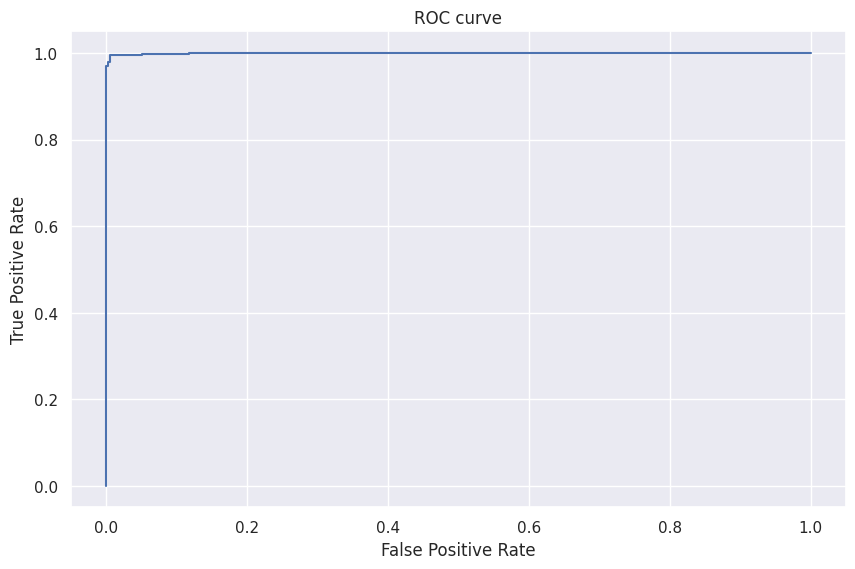

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=trainy, y_score=train_y_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(trainy, train_y_proba))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
y_pred = y_proba >= threshold

print(classification_report(y_true=testy, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       123

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Area under the Receiver Operating Characteristic curve: 1.0


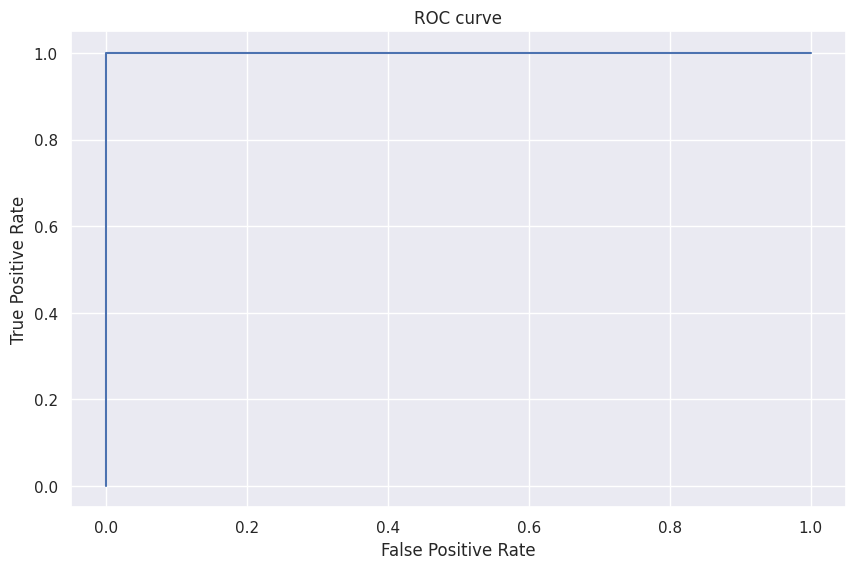

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=testy, y_score=y_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(testy, y_proba))

## f) Plot decision boundary

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = sigmoid_func(xx.ravel(), yy.ravel(), beta0_hat, beta1_hat, beta2_hat)
Z = Z >= threshold

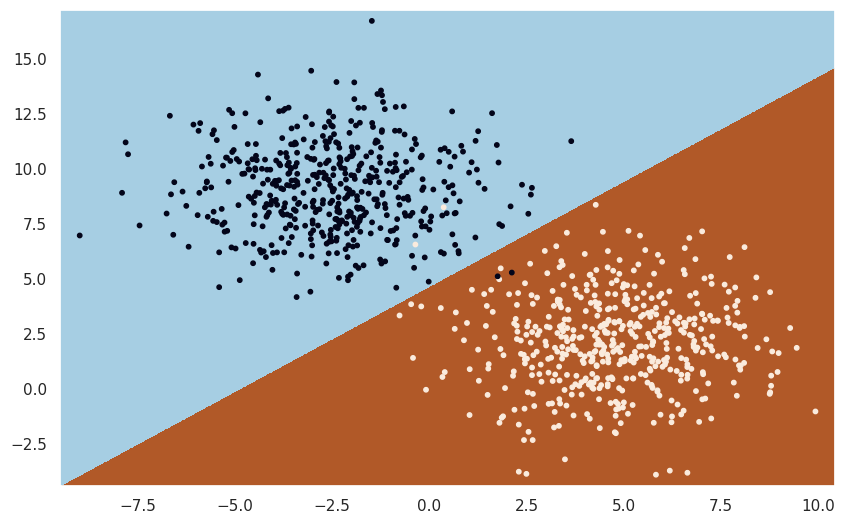

In [ ]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

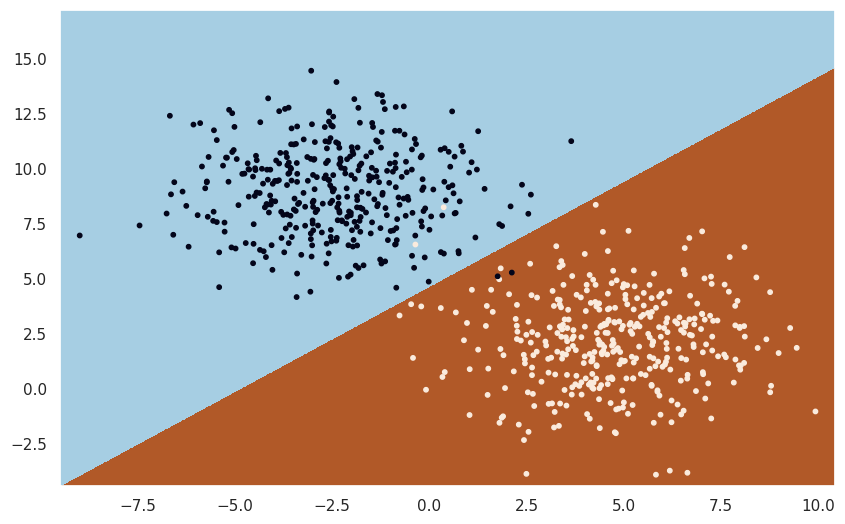

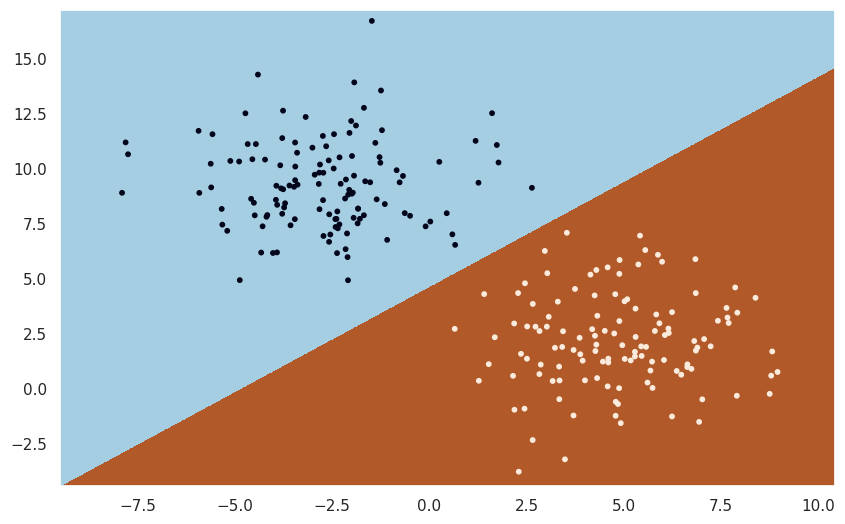

In [ ]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(trainX[:,0],trainX[:,1],c=trainy,s=10)
plt.show()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(testX[:,0],testX[:,1],c=testy,s=10)
plt.show()

# Task 2
- Repeat Task 2 by adding polynomial features (degree=2 with interaction term) and this time use new dataset below. You must include metric and decision boundary plot.
- **Note** you should **NOT** use sklearn polynomial.


In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(n_samples=1000, noise=.05, random_state=42)
trainX,testX,trainy,testy = train_test_split(X,y, random_state=42)

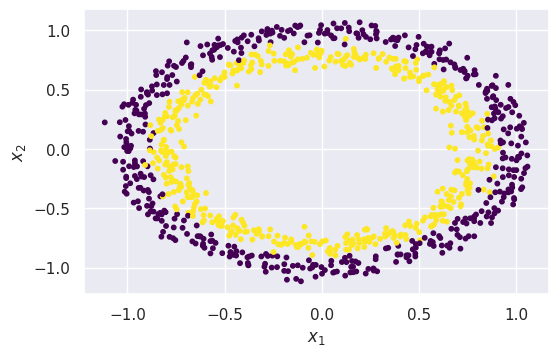

In [ ]:
matplotlib.rcParams['figure.figsize'] = [6, 3.7]
plt.scatter(X[:,0],X[:,1],c=y,s=10, cmap='viridis')
plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")

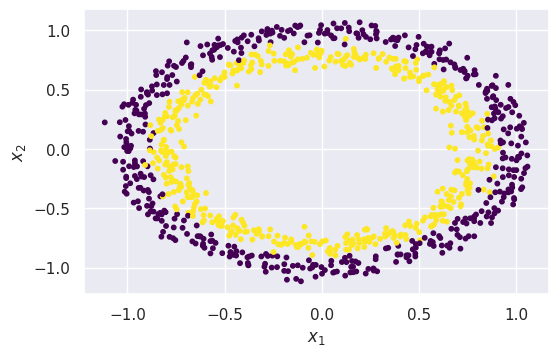

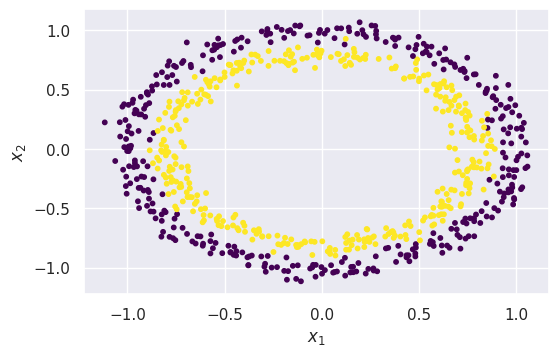

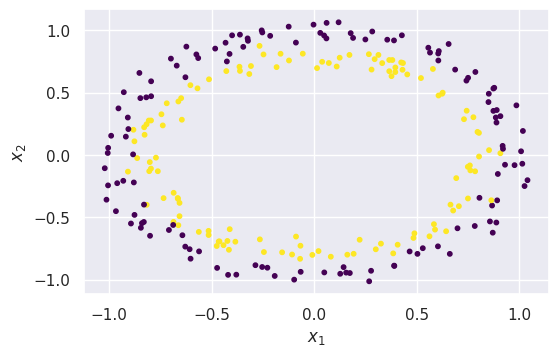

In [ ]:
matplotlib.rcParams['figure.figsize'] = [6, 3.7]
plt.scatter(X[:,0],X[:,1],c=y,s=10, cmap='viridis')
plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")
plt.show()

matplotlib.rcParams['figure.figsize'] = [6, 3.7]
plt.scatter(trainX[:,0],trainX[:,1],c=trainy,s=10, cmap='viridis')
plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")
plt.show()

matplotlib.rcParams['figure.figsize'] = [6, 3.7]
plt.scatter(testX[:,0],testX[:,1],c=testy,s=10, cmap='viridis')
plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")
plt.show()

In [ ]:
X0_sq = np.square(X [:, 0] )
X1_sq = np.square(X [:, 1] )
X0_X1 = np.multiply(X [:, 0], X [:, 1])
X = np.hstack((X, X0_sq[:, np.newaxis], X1_sq[:, np.newaxis], X0_X1[:, np.newaxis]))
X

array([[ 0.74220688,  0.24668576,  0.55087105,  0.06085386,  0.18309187],
       [-0.7340323 ,  0.16869164,  0.53880342,  0.02845687, -0.12382511],
       [-0.82985872,  0.22195899,  0.68866549,  0.04926579, -0.1841946 ],
       ...,
       [-0.12823057, -0.82613318,  0.01644308,  0.68249603,  0.10593552],
       [ 0.66090453, -0.79319015,  0.4367948 ,  0.62915061, -0.52422296],
       [ 0.27841491,  0.96735953,  0.07751486,  0.93578446,  0.26932732]])

## a) Write down the equation for computing loss function, identify parameters to be learned

It is the same as in task 2, except with more variables, so I will skip the derivation process.



Parameters to be learned =
$$\hat{\beta_.} =  \hat{\beta_0},\hat{\beta_1},\hat{\beta_2},\hat{\beta_3},\hat{\beta_4},\hat{\beta_5}$$

$$ \underset{{\beta_0},{\beta_1},{\beta_2},{\beta_3},{\beta_4},{\beta_5}}{\operatorname{argmax}} \ = ln(L(y; \beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5)) =
$$

$$
= \sum_{i=0}^n \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}^2+\beta_4x_{i2}^2+\beta_5x_{i1}x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}^2+\beta_4x_{i2}^2+\beta_5x_{i1}x_{i2}  \right) \right]
$$



## b) Write equation for gradient of loss function

$$
\nabla_{\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5} L(\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5) = \frac{\partial L}{\partial \beta_0}, \frac{\partial L}{\partial \beta_1}, \frac{\partial L}{\partial \beta_2}, \frac{\partial L}{\partial \beta_3}, \frac{\partial L}{\partial \beta_4}, \frac{\partial L}{\partial \beta_5}
$$


$$
=  \sum_{i=0}^n \nabla_{\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5} \left[  
  - ln (e^{\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}^2+\beta_4x_{i2}^2+\beta_5x_{i1}x_{i2}} + 1) +
y_i  \left(
\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}^2+\beta_4x_{i2}^2+\beta_5x_{i1}x_{i2}  \right) \right]
$$

$$ \nabla_{\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5} L(\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5) =
\begin{bmatrix}
\frac{\partial L}{\partial \beta_0}\\
\frac{\partial L}{\partial \beta_1}\\
\frac{\partial L}{\partial \beta_2}\\
\frac{\partial L}{\partial \beta_3}\\
\frac{\partial L}{\partial \beta_4}\\
\frac{\partial L}{\partial \beta_5}\\
\end{bmatrix}$$

$$
=
\begin{bmatrix}
\sum_{i=0}^n  \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i1}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i1}^2   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i2}^2   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i1} x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\end{bmatrix}
$$

## c) Write algorithm in pseudo code or describe steps in English

1. Initialize parameters ($\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$) with random numbers

while sum of partial derivatives smaller than convergence threshold and iteration number smaller than maximum iterations:

2. Compute $\hat{y} $ using the sigmoid function
3. Compute partial derivatives with regards to each parameters (multiply by -1)
4. Compute sum of partial derivatives
5. Compute new parameters using the rule: $\theta_{new}$ = $\theta_{old}$ + α * ∇L($\theta_{old}$), where α is the learning rate.


## d) Build a logistic regression model to classify dataset below

I used `np.float128()` to avoid the error: `overflow encountered in exp`

$ \frac{1} {1+e^{-\beta_0-\beta_1x_{i1}-\beta_2x_{i2}-\beta_3x_{i1}^2-\beta_4x_{i2}^2-\beta_5x_{i1}x_{i2}}} $


In [ ]:
def poly_sigmoid_func(xi1: float, xi2: float, beta0: float, beta1: float, beta2: float, beta3: float, beta4: float, beta5: float):
  numerator = 1.0
  denominator = 1.0 + np.exp( np.float128(-beta0-beta1*xi1-beta2*xi2-beta3*(xi1**2)-beta4*(xi2**2)-beta5*xi1*xi2) )
  return numerator / denominator

$$ \nabla_{\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5} L(\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5) =
\begin{bmatrix}
\frac{\partial L}{\partial \beta_0}\\
\frac{\partial L}{\partial \beta_1}\\
\frac{\partial L}{\partial \beta_2}\\
\frac{\partial L}{\partial \beta_3}\\
\frac{\partial L}{\partial \beta_4}\\
\frac{\partial L}{\partial \beta_5}\\
\end{bmatrix}$$

$$
=
\begin{bmatrix}
\sum_{i=0}^n  \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i1}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\sum_{i=0}^n  x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i1}^2   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i2}^2   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
 \sum_{i=0}^n  x_{i1} x_{i2}   \left[  
 y_i  -  \sigma(\beta^TX_i)     \right] \\
\end{bmatrix}
$$

In [ ]:
def poly_log_likelihood(y: np.ndarray, x1: np.ndarray, x2: np.ndarray, beta0: float,
                   beta1: float, beta2: float, beta3: float, beta4: float,
                   beta5: float, negative_grad: bool = True):
  predicted_y = poly_sigmoid_func(x1, x2, beta0, beta1, beta2, beta3, beta4, beta5)

  # partial_b0 = np.sum(np.subtract(y, predicted_y))
  # partial_b1 = np.sum(np.multiply(x1, np.subtract(y, predicted_y)) )
  # partial_b2 = np.sum(np.multiply(x2, np.subtract(y, predicted_y)) )
  # partial_b3 = np.sum(np.multiply(np.power(x1,2), np.subtract(y, predicted_y)) )
  # partial_b4 = np.sum(np.multiply(np.power(x2,2), np.subtract(y, predicted_y)) )
  # partial_b5 = np.sum(np.multiply(np.multiply(x1, x2), np.subtract(y, predicted_y)) )


  partial_b0 = np.sum(np.subtract(y, predicted_y))
  partial_b1 = np.sum(np.multiply(x1, np.subtract(y, predicted_y)) )
  partial_b2 = np.sum(np.multiply(x2, np.subtract(y, predicted_y)) )
  partial_b3 = np.sum(np.multiply(np.power(x1,2), np.subtract(y, predicted_y)) )
  partial_b4 = np.sum(np.multiply(np.power(x2,2), np.subtract(y, predicted_y)) )
  partial_b5 = np.sum(np.multiply(np.multiply(x1, x2), np.subtract(y, predicted_y)) )

  if negative_grad is True:
    return np.array([-partial_b0, -partial_b1, -partial_b2, -partial_b3, -partial_b4, -partial_b5])
  return np.array([partial_b0, partial_b1, partial_b2, partial_b3, partial_b4, partial_b5])

In [ ]:
import sys
import math
def poly_gradient_descent(y: np.ndarray, x1: np.ndarray, x2:np.ndarray, learning_rate: float = 0.0001, converge_threshold: float = 0.001, max_iter = 1000000, init_param={}):

  beta0 = init_param.get('beta0', 0)
  beta1 = init_param.get('beta1', np.random.rand(1)[0])
  beta2 = init_param.get('beta2', np.random.rand(1)[0])
  beta3 = init_param.get('beta3', np.random.rand(1)[0])
  beta4 = init_param.get('beta4', np.random.rand(1)[0])
  beta5 = init_param.get('beta5', np.random.rand(1)[0])

  diff = converge_threshold + 1
  iteration_num = 0
  print_at = math.floor(max_iter/1000)

  while diff > converge_threshold and iteration_num < max_iter:
    iteration_num += 1
    if iteration_num % print_at == 0:
      print(f"{iteration_num} iterations:  \n 𝛽0={beta0} 𝛽1={beta1} 𝛽2={beta2} 𝛽3={beta3} 𝛽4={beta4} 𝛽5={beta5} \n diff={diff} threshold {converge_threshold}")

    partial_b0, partial_b1, partial_b2, partial_b3, partial_b4, partial_b5 = poly_log_likelihood(y=y,
                                                      x1=x1,
                                                      x2=x2,
                                                      beta0=beta0,
                                                      beta1=beta1,
                                                      beta2=beta2,
                                                      beta3=beta3,
                                                      beta4=beta4,
                                                      beta5=beta5,
                                                      negative_grad = True)


    diff = np.sum( np.abs([partial_b0, partial_b1, partial_b2, partial_b3, partial_b4, partial_b5]) )

    # The update rule for gradient ascent is typically:
    # θ_new = θ_old + α * ∇L(θ_old), where α is the learning rate.
    beta0 = beta0 - learning_rate * partial_b0
    beta1 = beta1 - learning_rate * partial_b1
    beta2 = beta2 - learning_rate * partial_b2
    beta3 = beta3 - learning_rate * partial_b3
    beta4 = beta4 - learning_rate * partial_b4
    beta5 = beta5 - learning_rate * partial_b5

  print(f"Converged after it {iteration_num}:  \n 𝛽0={beta0} 𝛽1={beta1} 𝛽2={beta2} 𝛽3={beta3} 𝛽4={beta4} 𝛽5={beta5} \n diff={diff} threshold {converge_threshold}")
  return np.array([beta0, beta1, beta2, beta3, beta4, beta5])

In [ ]:
beta0_hat, beta1_hat, beta2_hat, beta3_hat, beta4_hat, beta5_hat = poly_gradient_descent(y=trainy,
                                                   x1 = trainX[:, 0],
                                                   x2 = trainX[:, 1],
                                                   learning_rate = 0.01,
                                                   converge_threshold=0.001)

1000 iterations:  
 𝛽0=20.697750347863884 𝛽1=0.01896713088024131 𝛽2=-0.06865663749666502 𝛽3=-25.62743293563265 𝛽4=-25.292694150720926 𝛽5=-0.20743156298139698 
 diff=2.0836928203651315 threshold 0.001
2000 iterations:  
 𝛽0=24.985614351559644 𝛽1=0.05629621129215706 𝛽2=-0.11188922406180443 𝛽3=-31.02063524520682 𝛽4=-30.543949004561913 𝛽5=-0.13090312042744756 
 diff=1.1345940830247703 threshold 0.001
3000 iterations:  
 𝛽0=27.646878121747516 𝛽1=0.08279321311523777 𝛽2=-0.14429893132953633 𝛽3=-34.37720786202776 𝛽4=-33.803073350732056 𝛽5=-0.06983459868189472 
 diff=0.7879387469692636 threshold 0.001
4000 iterations:  
 𝛽0=29.591535299540407 𝛽1=0.10315725514691189 𝛽2=-0.17030407338253126 𝛽3=-36.83277342902444 𝛽4=-36.184912776596555 𝛽5=-0.019507522644479833 
 diff=0.604091666276038 threshold 0.001
5000 iterations:  
 𝛽0=31.12343708806942 𝛽1=0.11961641846498822 𝛽2=-0.1920031367284797 𝛽3=-38.76820448024432 𝛽4=-38.06152734013189 𝛽5=0.023159952298856656 
 diff=0.4888028368233303 threshold 0.001
600

In [ ]:
train_y_proba = poly_sigmoid_func(trainX[:, 0], trainX[:, 1], beta0_hat, beta1_hat, beta2_hat, beta3_hat, beta4_hat, beta5_hat)

In [ ]:
y_proba = poly_sigmoid_func(testX[:, 0], testX[:, 1], beta0_hat, beta1_hat, beta2_hat, beta3_hat, beta4_hat, beta5_hat)

## e) Compute confusion matrix and AUC of your model

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
train_y_pred = train_y_proba >= threshold

print(classification_report(y_true=trainy, y_pred=train_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       371
           1       0.98      0.98      0.98       379

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



Training Data
Area under the Receiver Operating Characteristic curve: 0.99894032387685


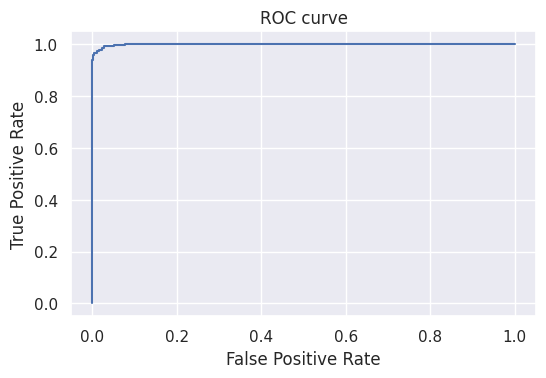

In [ ]:
print("Training Data")
fpr, tpr, thresholds = roc_curve(y_true=trainy, y_score=train_y_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(trainy, train_y_proba))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
y_pred = y_proba >= threshold

print(classification_report(y_true=testy, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       129
           1       0.95      0.95      0.95       121

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



Testing Data
Area under the Receiver Operating Characteristic curve: 0.9925683900313922


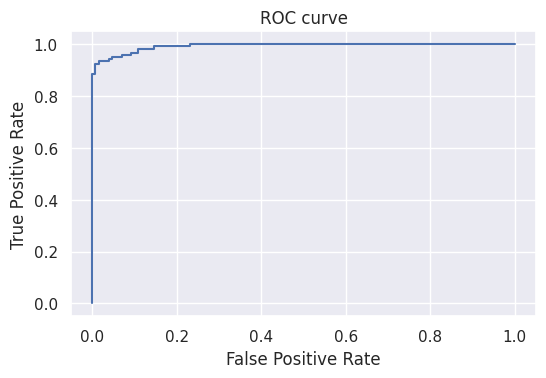

In [ ]:
print("Testing Data")
fpr, tpr, thresholds = roc_curve(y_true=testy, y_score=y_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(testy, y_proba))

## f) Plot decision boundary

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = poly_sigmoid_func(xx.ravel(), yy.ravel(), beta0_hat, beta1_hat, beta2_hat, beta3_hat, beta4_hat, beta5_hat)
Z = Z >= threshold

All Data


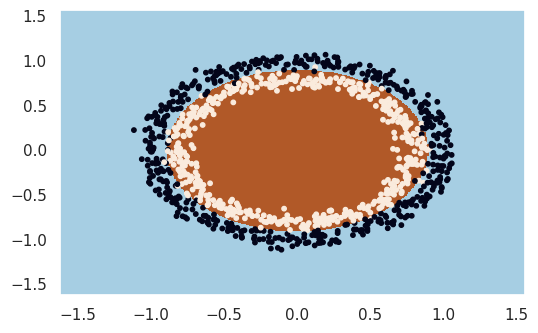

In [ ]:
print("All Data")
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

Training Data


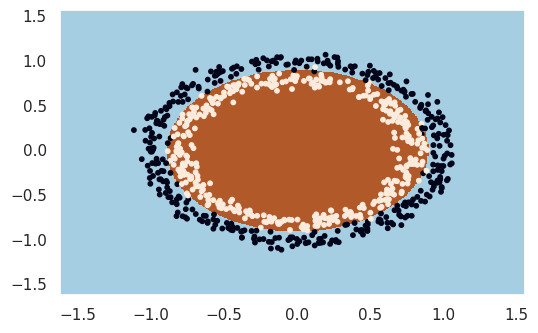

Testing Data


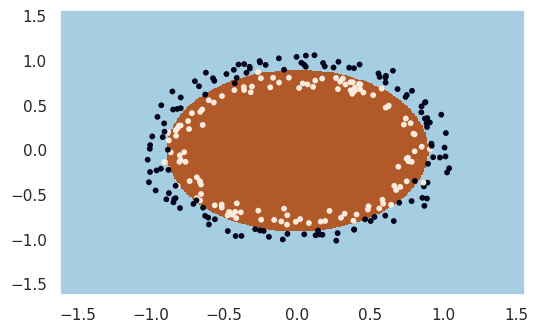

In [ ]:
print("Training Data")
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(trainX[:,0],trainX[:,1],c=trainy,s=10)
plt.show()
print("Testing Data")
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(testX[:,0],testX[:,1],c=testy,s=10)
plt.show()